In [126]:
#import libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.models import Model

In [127]:
from keras.datasets import mnist
#import dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [128]:
#get the dataset shape
X_train.shape

(60000, 28, 28)

Text(0.5, 1.0, 'Ground Truth : 5')

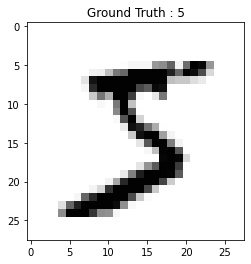

In [129]:
plt.imshow(X_train[0,:,:],cmap='Greys')
plt.title('Ground Truth : {}'.format(y_train[0]))

In [130]:
# FLATTEN 28 x 28 IMAGE TO 784 VECTOR
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [131]:
# NORMALIZE INPUTS FROM RGB COLOR TO 0-1
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

In [132]:
# A "BINARIZATION" OF THE CATEGORIES
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
num_classes = y_test_cat.shape[1]

In [135]:
# BUILD THE MODELS

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 

def boosted_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 

def tanh_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 

def functional_model():
    #Define layers of the model
    i = Input(shape=(num_pixels))
    x = Dense(num_pixels, activation='relu', kernel_initializer='normal')(i)
    x = Dense(64, activation='relu')(x)
    o = Dense(num_classes, activation='softmax')(x)
    #create the model
    model = Model(inputs=i, outputs=o)
    #Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def extra_credit_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model with SPARSE loss
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 

##Baseline Model 
Accuracy: 97.8%

In [90]:
# RUN THE MODEL

model = baseline_model()

# FIT THE MODEL

history  = model.fit(X_train_norm, y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=10, batch_size=1000, verbose=2)

# EVALUATE THE MODEL
scores = model.evaluate(X_test_norm, y_test_cat, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
60/60 - 8s - loss: 0.6634 - accuracy: 0.8354 - val_loss: 0.2733 - val_accuracy: 0.9220 - 8s/epoch - 135ms/step
Epoch 2/10
60/60 - 8s - loss: 0.2304 - accuracy: 0.9359 - val_loss: 0.1826 - val_accuracy: 0.9473 - 8s/epoch - 130ms/step
Epoch 3/10
60/60 - 8s - loss: 0.1628 - accuracy: 0.9534 - val_loss: 0.1449 - val_accuracy: 0.9577 - 8s/epoch - 134ms/step
Epoch 4/10
60/60 - 7s - loss: 0.1240 - accuracy: 0.9646 - val_loss: 0.1143 - val_accuracy: 0.9657 - 7s/epoch - 109ms/step
Epoch 5/10
60/60 - 3s - loss: 0.0961 - accuracy: 0.9724 - val_loss: 0.0975 - val_accuracy: 0.9709 - 3s/epoch - 50ms/step
Epoch 6/10
60/60 - 3s - loss: 0.0786 - accuracy: 0.9776 - val_loss: 0.0886 - val_accuracy: 0.9741 - 3s/epoch - 51ms/step
Epoch 7/10
60/60 - 3s - loss: 0.0653 - accuracy: 0.9813 - val_loss: 0.0868 - val_accuracy: 0.9728 - 3s/epoch - 55ms/step
Epoch 8/10
60/60 - 3s - loss: 0.0538 - accuracy: 0.9852 - val_loss: 0.0756 - val_accuracy: 0.9778 - 3s/epoch - 51ms/step
Epoch 9/10
60/60 - 7s - loss

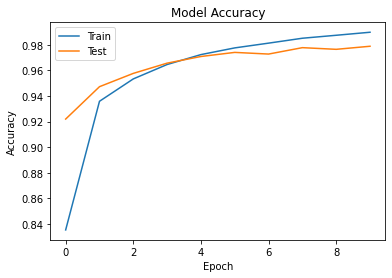

In [91]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

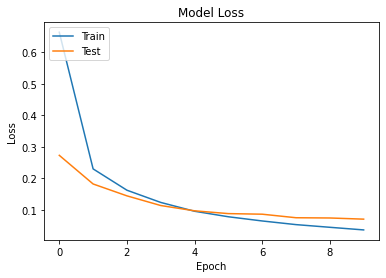

In [92]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Boosted Model 
Accuracy: 98.0%

In [136]:
# RUN THE MODEL

model = boosted_model()

# FIT THE MODEL

history  = model.fit(X_train_norm, y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=10, batch_size=1000, verbose=2)

# EVALUATE THE MODEL
scores = model.evaluate(X_test_norm, y_test_cat, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
60/60 - 4s - loss: 0.6628 - accuracy: 0.8293 - val_loss: 0.2514 - val_accuracy: 0.9259 - 4s/epoch - 62ms/step
Epoch 2/10
60/60 - 3s - loss: 0.2074 - accuracy: 0.9399 - val_loss: 0.1681 - val_accuracy: 0.9505 - 3s/epoch - 53ms/step
Epoch 3/10
60/60 - 3s - loss: 0.1413 - accuracy: 0.9598 - val_loss: 0.1353 - val_accuracy: 0.9580 - 3s/epoch - 52ms/step
Epoch 4/10
60/60 - 3s - loss: 0.1062 - accuracy: 0.9693 - val_loss: 0.1043 - val_accuracy: 0.9684 - 3s/epoch - 52ms/step
Epoch 5/10
60/60 - 3s - loss: 0.0811 - accuracy: 0.9764 - val_loss: 0.0889 - val_accuracy: 0.9726 - 3s/epoch - 52ms/step
Epoch 6/10
60/60 - 3s - loss: 0.0629 - accuracy: 0.9821 - val_loss: 0.0833 - val_accuracy: 0.9751 - 3s/epoch - 53ms/step
Epoch 7/10
60/60 - 3s - loss: 0.0505 - accuracy: 0.9855 - val_loss: 0.0787 - val_accuracy: 0.9754 - 3s/epoch - 52ms/step
Epoch 8/10
60/60 - 3s - loss: 0.0404 - accuracy: 0.9886 - val_loss: 0.0701 - val_accuracy: 0.9795 - 3s/epoch - 53ms/step
Epoch 9/10
60/60 - 3s - loss: 0.

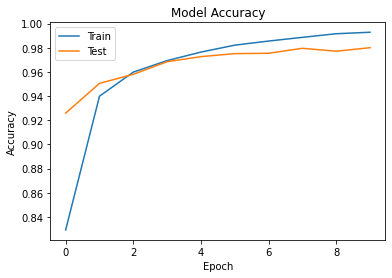

In [137]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

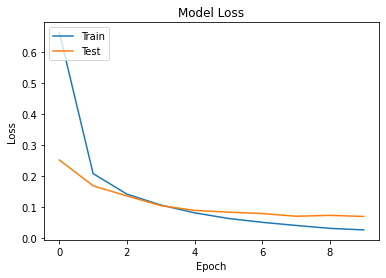

In [138]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Tanh Model 
Accuracy: 97.5%

In [93]:
# RUN THE MODEL

model = tanh_model()

# FIT THE MODEL

history  = model.fit(X_train_norm, y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=10, batch_size=1000, verbose=2)

# EVALUATE THE MODEL
scores = model.evaluate(X_test_norm, y_test_cat, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
60/60 - 5s - loss: 0.8291 - accuracy: 0.8371 - val_loss: 0.3853 - val_accuracy: 0.9147 - 5s/epoch - 83ms/step
Epoch 2/10
60/60 - 5s - loss: 0.3166 - accuracy: 0.9217 - val_loss: 0.2552 - val_accuracy: 0.9341 - 5s/epoch - 80ms/step
Epoch 3/10
60/60 - 3s - loss: 0.2265 - accuracy: 0.9402 - val_loss: 0.1974 - val_accuracy: 0.9471 - 3s/epoch - 52ms/step
Epoch 4/10
60/60 - 4s - loss: 0.1752 - accuracy: 0.9535 - val_loss: 0.1624 - val_accuracy: 0.9546 - 4s/epoch - 68ms/step
Epoch 5/10
60/60 - 4s - loss: 0.1398 - accuracy: 0.9625 - val_loss: 0.1348 - val_accuracy: 0.9601 - 4s/epoch - 59ms/step
Epoch 6/10
60/60 - 3s - loss: 0.1155 - accuracy: 0.9686 - val_loss: 0.1172 - val_accuracy: 0.9648 - 3s/epoch - 51ms/step
Epoch 7/10
60/60 - 3s - loss: 0.0941 - accuracy: 0.9747 - val_loss: 0.1047 - val_accuracy: 0.9702 - 3s/epoch - 50ms/step
Epoch 8/10
60/60 - 3s - loss: 0.0789 - accuracy: 0.9788 - val_loss: 0.0979 - val_accuracy: 0.9711 - 3s/epoch - 51ms/step
Epoch 9/10
60/60 - 3s - loss: 0.

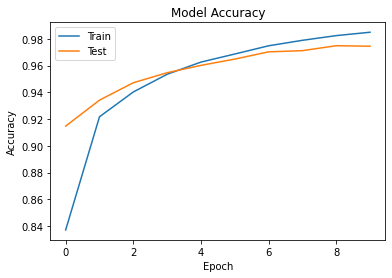

In [94]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

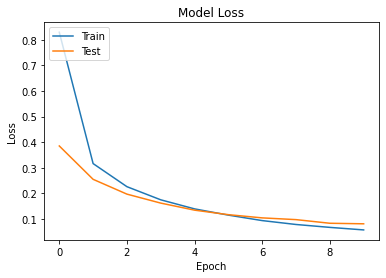

In [95]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Un-Scaled Image Model 
Accuracy: 96%

In [96]:
# RUN THE MODEL

model = baseline_model()

# FIT THE MODEL

history  = model.fit(X_train, y_train_cat, validation_data=(X_test, y_test_cat), epochs=10, batch_size=1000, verbose=2)

# EVALUATE THE MODEL
scores = model.evaluate(X_test, y_test_cat, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
60/60 - 4s - loss: 2.7277 - accuracy: 0.7257 - val_loss: 0.4830 - val_accuracy: 0.8807 - 4s/epoch - 59ms/step
Epoch 2/10
60/60 - 3s - loss: 0.3935 - accuracy: 0.9007 - val_loss: 0.3350 - val_accuracy: 0.9154 - 3s/epoch - 51ms/step
Epoch 3/10
60/60 - 3s - loss: 0.2650 - accuracy: 0.9288 - val_loss: 0.2650 - val_accuracy: 0.9330 - 3s/epoch - 50ms/step
Epoch 4/10
60/60 - 3s - loss: 0.1960 - accuracy: 0.9461 - val_loss: 0.2218 - val_accuracy: 0.9409 - 3s/epoch - 50ms/step
Epoch 5/10
60/60 - 3s - loss: 0.1515 - accuracy: 0.9563 - val_loss: 0.2028 - val_accuracy: 0.9480 - 3s/epoch - 50ms/step
Epoch 6/10
60/60 - 3s - loss: 0.1213 - accuracy: 0.9650 - val_loss: 0.1795 - val_accuracy: 0.9529 - 3s/epoch - 50ms/step
Epoch 7/10
60/60 - 4s - loss: 0.0975 - accuracy: 0.9712 - val_loss: 0.1637 - val_accuracy: 0.9568 - 4s/epoch - 75ms/step
Epoch 8/10
60/60 - 3s - loss: 0.0800 - accuracy: 0.9763 - val_loss: 0.1564 - val_accuracy: 0.9618 - 3s/epoch - 56ms/step
Epoch 9/10
60/60 - 3s - loss: 0.

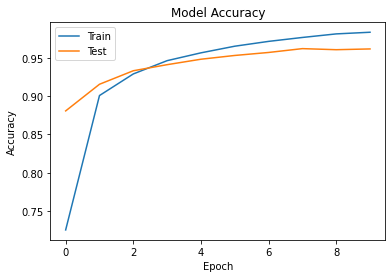

In [97]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

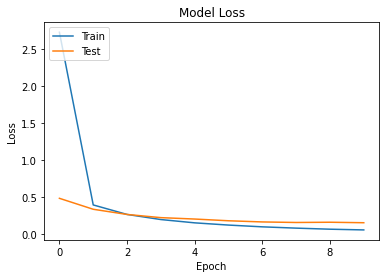

In [98]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Functional API Model
Accuracy: 97.9%

In [99]:
# RUN THE MODEL

model = functional_model()

# FIT THE MODEL

history  = model.fit(X_train_norm, y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=10, batch_size=1000, verbose=2)

# EVALUATE THE MODEL
scores = model.evaluate(X_test_norm, y_test_cat, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
60/60 - 4s - loss: 0.5036 - accuracy: 0.8613 - val_loss: 0.2092 - val_accuracy: 0.9395 - 4s/epoch - 60ms/step
Epoch 2/10
60/60 - 3s - loss: 0.1726 - accuracy: 0.9499 - val_loss: 0.1437 - val_accuracy: 0.9574 - 3s/epoch - 50ms/step
Epoch 3/10
60/60 - 3s - loss: 0.1192 - accuracy: 0.9659 - val_loss: 0.1121 - val_accuracy: 0.9664 - 3s/epoch - 50ms/step
Epoch 4/10
60/60 - 3s - loss: 0.0893 - accuracy: 0.9748 - val_loss: 0.0930 - val_accuracy: 0.9714 - 3s/epoch - 50ms/step
Epoch 5/10
60/60 - 3s - loss: 0.0677 - accuracy: 0.9811 - val_loss: 0.0801 - val_accuracy: 0.9748 - 3s/epoch - 51ms/step
Epoch 6/10
60/60 - 3s - loss: 0.0527 - accuracy: 0.9855 - val_loss: 0.0754 - val_accuracy: 0.9763 - 3s/epoch - 57ms/step
Epoch 7/10
60/60 - 3s - loss: 0.0413 - accuracy: 0.9887 - val_loss: 0.0694 - val_accuracy: 0.9788 - 3s/epoch - 50ms/step
Epoch 8/10
60/60 - 3s - loss: 0.0332 - accuracy: 0.9912 - val_loss: 0.0667 - val_accuracy: 0.9792 - 3s/epoch - 50ms/step
Epoch 9/10
60/60 - 3s - loss: 0.

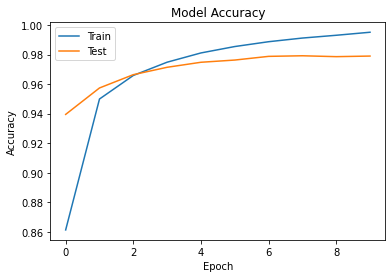

In [100]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

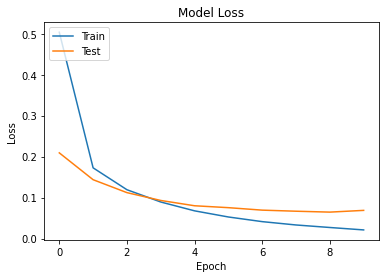

In [101]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Inference on the Model


Text(0.5, 1.0, 'Prediction : 0')

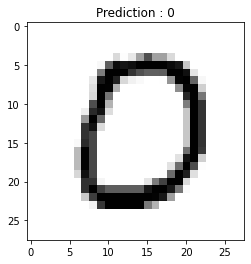

In [112]:
import matplotlib.pyplot as plt

image_index = 10
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')

pred = model.predict(X_test[image_index].reshape(1, 784))
plt.title('Prediction : {}'.format(pred.argmax()))


#Extra Credit

##Baseline Model with Sparse loss
Accuracy: 97.9%

To be able to use a sparse loss, we need to use labels that are NOT one hot encoded.

Here we just use the raw labels of the data.

In [113]:
# RUN THE MODEL

model = extra_credit_model()

# FIT THE MODEL

history  = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=10, batch_size=1000, verbose=2)

# EVALUATE THE MODEL
scores = model.evaluate(X_test_norm, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
60/60 - 4s - loss: 0.6656 - accuracy: 0.8265 - val_loss: 0.2645 - val_accuracy: 0.9238 - 4s/epoch - 59ms/step
Epoch 2/10
60/60 - 3s - loss: 0.2242 - accuracy: 0.9372 - val_loss: 0.1784 - val_accuracy: 0.9491 - 3s/epoch - 50ms/step
Epoch 3/10
60/60 - 3s - loss: 0.1592 - accuracy: 0.9545 - val_loss: 0.1416 - val_accuracy: 0.9590 - 3s/epoch - 50ms/step
Epoch 4/10
60/60 - 3s - loss: 0.1220 - accuracy: 0.9648 - val_loss: 0.1142 - val_accuracy: 0.9651 - 3s/epoch - 50ms/step
Epoch 5/10
60/60 - 4s - loss: 0.0941 - accuracy: 0.9723 - val_loss: 0.0987 - val_accuracy: 0.9713 - 4s/epoch - 74ms/step
Epoch 6/10
60/60 - 3s - loss: 0.0767 - accuracy: 0.9774 - val_loss: 0.0879 - val_accuracy: 0.9732 - 3s/epoch - 52ms/step
Epoch 7/10
60/60 - 3s - loss: 0.0604 - accuracy: 0.9829 - val_loss: 0.0806 - val_accuracy: 0.9748 - 3s/epoch - 50ms/step
Epoch 8/10
60/60 - 3s - loss: 0.0497 - accuracy: 0.9859 - val_loss: 0.0742 - val_accuracy: 0.9768 - 3s/epoch - 51ms/step
Epoch 9/10
60/60 - 3s - loss: 0.

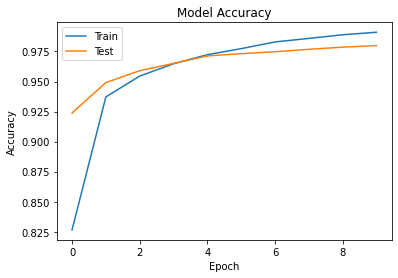

In [114]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

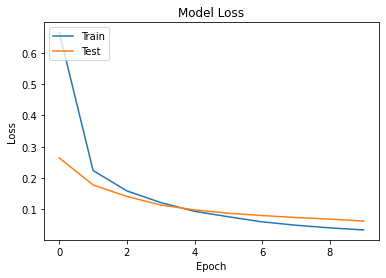

In [115]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##Numpy method to predict class

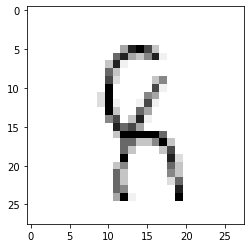

In [123]:
arbitrary_index = 542

plt.imshow(X_test[arbitrary_index].reshape(28, 28),cmap='Greys')

We can use the numpy function argmax() function to get the prediction

In [125]:
pred = model.predict(X_test[arbitrary_index].reshape(1, 784))
print(pred)
print('Prediction : {}'.format(pred.argmax()))

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Prediction : 8
